#### BLACK SCHOLES MODEL

- S - 기초자산의 가격
- K - 행사가격
- T - 잔존만기
- r - 무위험이자율
- sigma - 변동성
- option_type - 옵션종류

https://blog.naver.com/stochastic73/221509754030

In [ ]:
import numpy as np
import scipy.stats as stat

def europian_option(S, K, T, r, sigma, option_type):

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        V = S * stat.norm.cdf(d1) - K * np.exp(-r * T) * stat.norm.cdf(d2)
    else:
        V = K * np.exp(-r * T) * stat.norm.cdf(-d2) - S * stat.norm.cdf(-d1)
    
    return V

#### KMV 모형(내재부도확률)

    - 왜 이렇게 설정했는지?

- N : 표준누적정규분포의 값
- V - 자산가치 = (주식가치 + 부채가치)
- F - 부채가치 = (유동부채 + 고정부채*0.5)
- r - 무위험이자율(국고채 3년 수익률)
- σV - 자산의 변동성 → sigma
- σE - 주식가치 변동성
- T - 추정기간(해당 기간 안에 부도 확률 추정)
- π - 내재부도확률 → KBM

π = N( - ((ln(V/F) + (r - 0.5*σV²)) / σV*√T)

In [26]:
def KMB(V, F, r, sigma, T):

    KMB = stat.norm.cdf(-(np.log(V / F) + (r - 0.5 * sigma ** 2)) / sigma * np.sqrt(T))
    
    return KMB

### DD 모형(부도 거리)

- σA - 해당기업 연간 자산의 변동성 → sigma
- µ - 연 평균 성장률
- VA - VE + VD (자산가치 = 자본 가치 + 총 부채)
- VE - (자본가치 = 발행주식수 * 해당시점주가)
- XT - T기간만에 만료되는 유동부채 잔액
- T - 추정기간(해당 기간 안에 부도 확률 추정)

DD = (ln(VA / XT) + (µ - σA²/2) * T) / σA * √T

In [ ]:
def DD(sigma, XT, µ, T):

    DD = (np.log(sigma / XT) + (µ - (sigma ** 2) / 2) * T) / sigma * np.sqrt(T)

    return DD

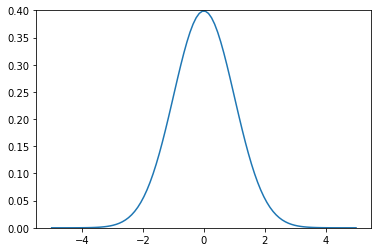

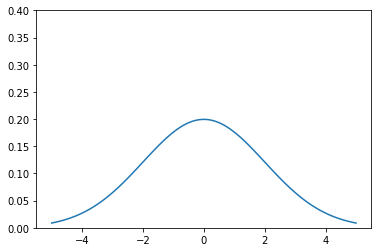

0.5
0.0


In [24]:
import matplotlib.pyplot as plt

# norm : 정규분포
# pdf : 확률밀도함수

rv = stat.norm(0,1)
x = np.linspace(-5,5,100)
y1 = rv.pdf(x)
plt.plot(x,y1)
plt.ylim(0,0.4)
plt.show()

rv = stat.norm(0,2) # 표준편차가 2가 되었음. 즉 분산은 4 
x = np.linspace(-5,5,100)
y1 = rv.pdf(x)
plt.plot(x,y1)
plt.ylim(0,0.4)
plt.show()

# cdf : 누적분포함수
print(rv.cdf(0))

# ppf : cdf의 역함수
print(rv.ppf(0.5))